# Brain Age Prediction XGBoost

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [28]:
import xgboost as xgb
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class XGBoostRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="XGBoost"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = xgb.XGBRegressor
        if params is None:
            self.params = {
                'objective': 'reg:squarederror',
                'n_estimators': 100,
                'learning_rate': 0.1,
                'max_depth': 3,
                'subsample': 0.8,
                'colsample_bytree': 0.8
            }
        if params_space is None:
            self.params_space = {
                'n_estimators': Integer(50, 1000), #cambiar a 5000
                'learning_rate': Real(0.0001, 0.2, prior='log-uniform'),
                'max_depth': Integer(3, 5),
                'subsample': Real(0.1, 1.0),
                'colsample_bytree': Real(0.1, 1.0)
            }

In [29]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = XGBoostRegressor()
Plotters = Plotter()

# Parametros de Plot
colorset = 'firebrick'
nameset = 'XGBoost'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=3

#scaler = MinMaxScaler()
Scaler_reg = MinMaxScaler()



In [4]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}Brain_Age/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [30]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [6]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

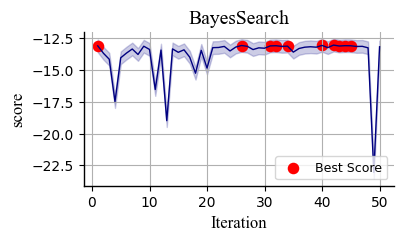

Top 1: Iteration 42, Score -13.041588305365915
Top 2: Iteration 40, Score -13.06837813999619
Top 3: Iteration 26, Score -13.0765778109489
Top 4: Iteration 44, Score -13.088600681977365
Top 5: Iteration 32, Score -13.092406724896637
Top 6: Iteration 45, Score -13.096478648503332
Top 7: Iteration 1, Score -13.101436359963657
Top 8: Iteration 31, Score -13.106563567890703
Top 9: Iteration 43, Score -13.115566401008303
Top 10: Iteration 34, Score -13.125102141782218


In [31]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [32]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'colsample_bytree': 1.0,
  'learning_rate': 0.011015276373276968,
  'max_depth': 5,
  'n_estimators': 796,
  'subsample': 0.3584806102527527},
 {'colsample_bytree': 1.0,
  'learning_rate': 0.008190419625719654,
  'max_depth': 5,
  'n_estimators': 776,
  'subsample': 0.21847962035236967},
 {'colsample_bytree': 1.0,
  'learning_rate': 0.010293658625817,
  'max_depth': 5,
  'n_estimators': 675,
  'subsample': 0.43766371875337584},
 {'colsample_bytree': 1.0,
  'learning_rate': 0.008447878513386018,
  'max_depth': 5,
  'n_estimators': 836,
  'subsample': 0.4374064554401057},
 {'colsample_bytree': 1.0,
  'learning_rate': 0.010907882806196749,
  'max_depth': 5,
  'n_estimators': 743,
  'subsample': 0.48195310807952596},
 {'colsample_bytree': 1.0,
  'learning_rate': 0.007848802737263868,
  'max_depth': 5,
  'n_estimators': 921,
  'subsample': 0.33371823544401746},
 {'colsample_bytree': 0.46909356296798244,
  'learning_rate': 0.025249018866510774,
  'max_depth': 5,
  'n_estimators': 350,
  's

In [21]:
best_params=opt_model.best_params_

# Training

In [33]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train,
        early_stopping_rounds = 5
    )

c:\python_env\brain_age_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all

In [14]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [15]:
with open('results_model/results_training.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [6]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.596e+04
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:59:38   Log-Likelihood:                -4227.9
No. Observations:                1323   AIC:                             8460.
Df Residuals:                    1321   BIC:                             8470.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.484e-15      0.411   6.05e-15      1.0

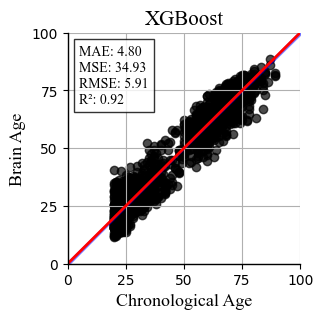

Error medio absoluto: 4.797704821323686
Error cuadrático medio: 34.93426418501872
Raíz del error cuadrático medio: 5.910521481647683
Coeficiente de determinación (R²): 0.9172529685138285


In [39]:
Plotters.plot_regresion(y=df_CN_avg_train['y_pred_corrected'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [ ]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_set
)

In [7]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [19]:
shap_summary_sorted_CN

[('Low_subj_spec_EPP_OCC_right', 2317.260913803171),
 ('IAF_OCC_left', 2112.7156796027325),
 ('High_subj_spec_EPP_CING_right', 1751.7178415682793),
 ('Low_subj_spec_RPD_CING_right', 1586.3595729871406),
 ('IAF_OCC_right', 1461.9981522741875),
 ('Alpha2_canon_EPP_HPC_left', 1068.9441952352174),
 ('Low_subj_spec_EPP_PARIET_left', 968.9680646754974),
 ('Alpha2_canon_RPD_CING_right', 816.9897613926394),
 ('Low_subj_spec_RPD_OCC_left', 733.9926363180705),
 ('Alpha2_canon_EPP_PARIET_left', 733.9709035571568),
 ('Low_subj_spec_EPP_PARIET_right', 717.1918458593851),
 ('Alpha2_canon_EPP_HPC_right', 592.2093855201688),
 ('Low_subj_spec_RPD_HPC_left', 546.1168898261334),
 ('High_subj_spec_RPD_CING_right', 545.1133003330791),
 ('High_subj_spec_EPP_PARIET_right', 532.8404879482547),
 ('High_subj_spec_EPP_HPC_right', 479.698094218668),
 ('Low_subj_spec_RPD_PARIET_left', 465.93546391583703),
 ('High_subj_spec_EPP_HPC_left', 447.32879995902414),
 ('Low_subj_spec_RPD_CING_left', 428.34507725102816),
 (

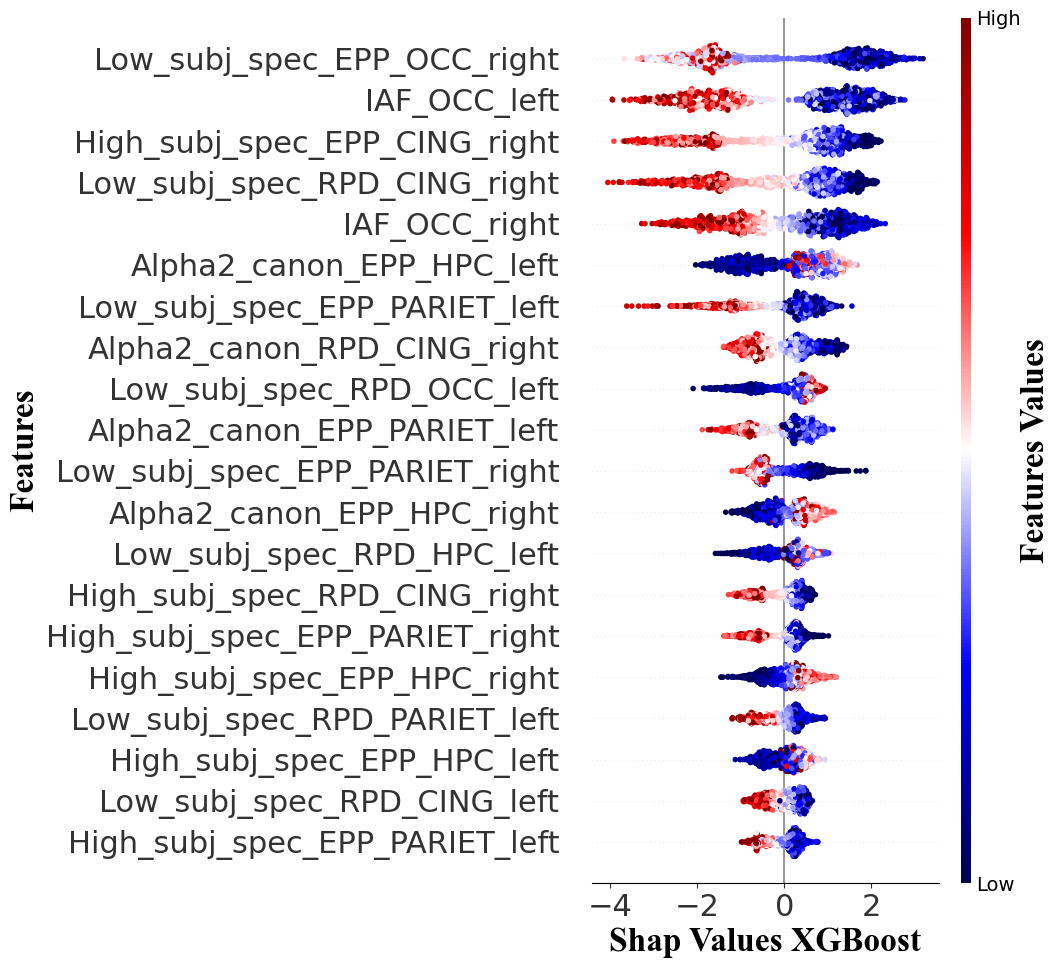

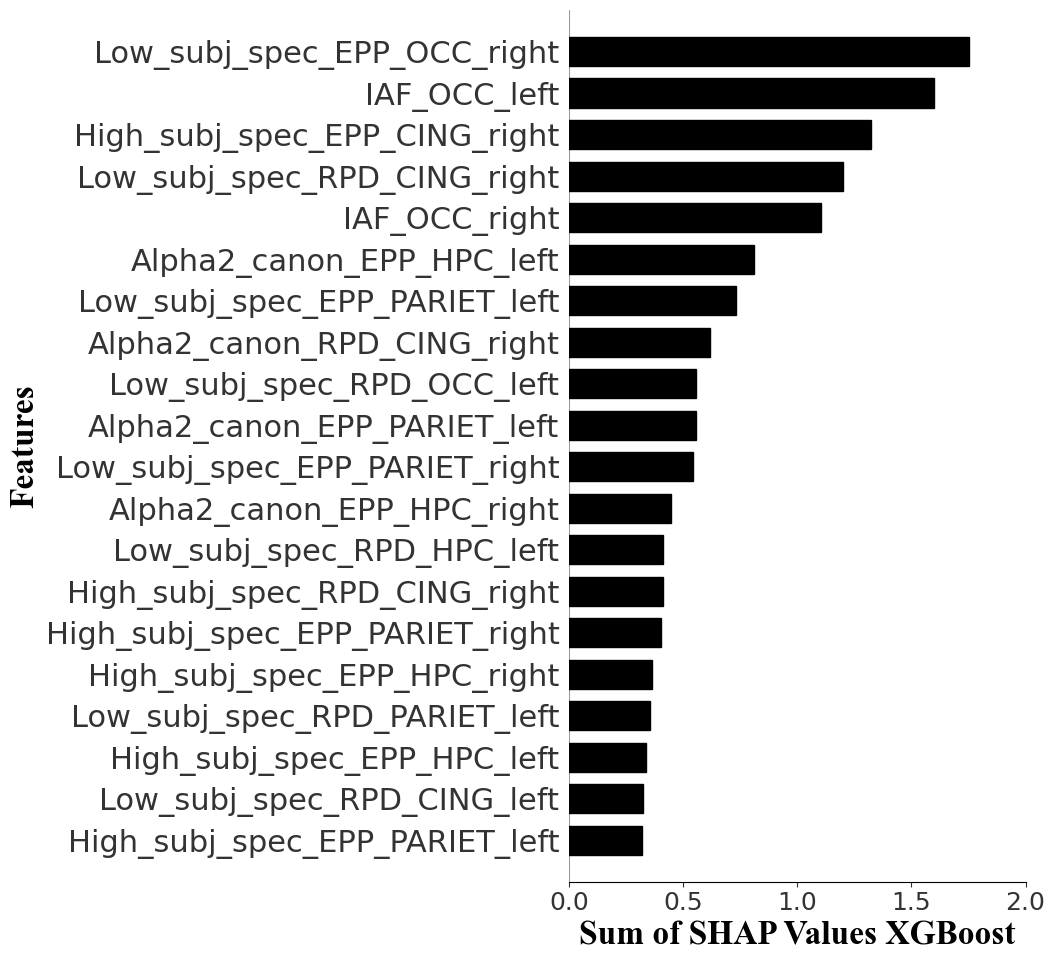

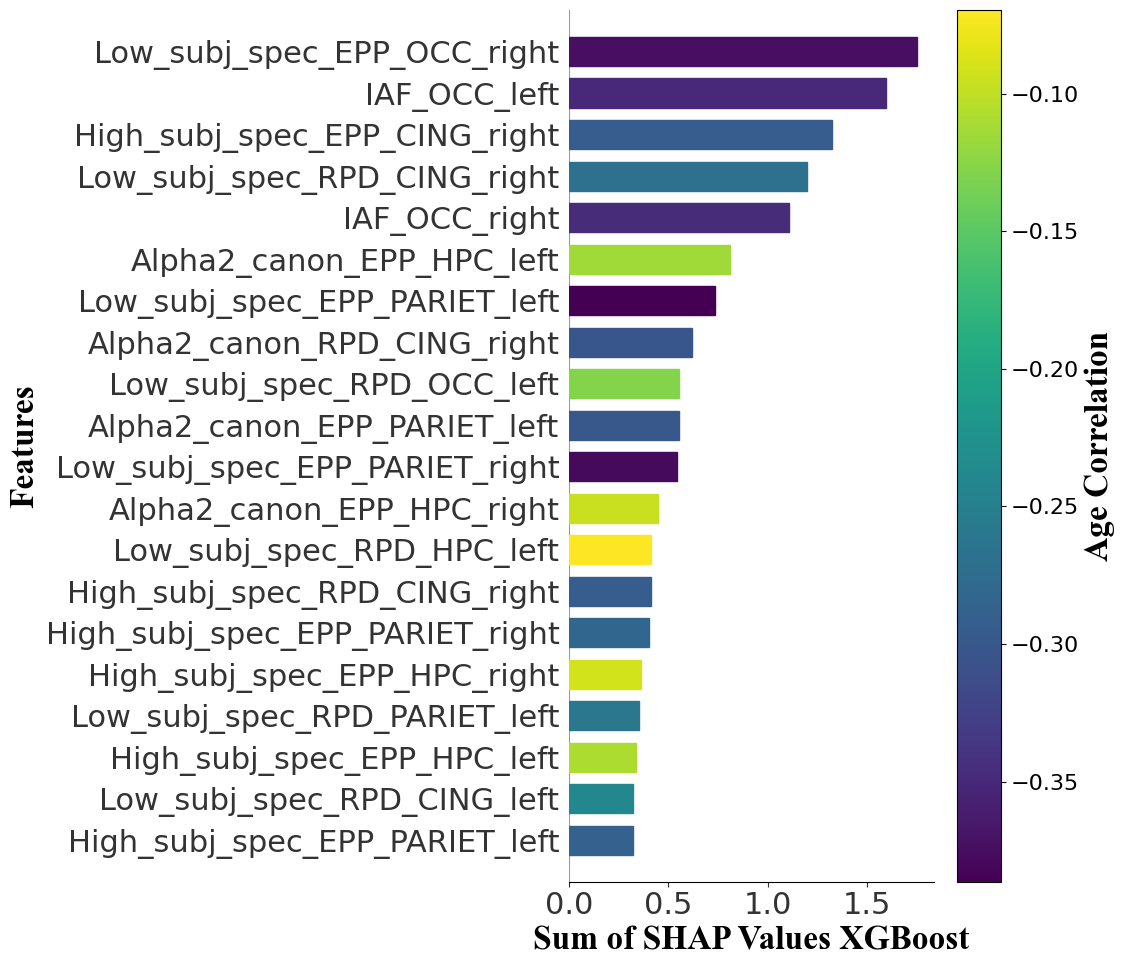

In [20]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [8]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=10)

CING_right: 1.000000
OCC_right: 0.909554
OCC_left: 0.685117
PARIET_left: 0.409846
HPC_left: 0.257263


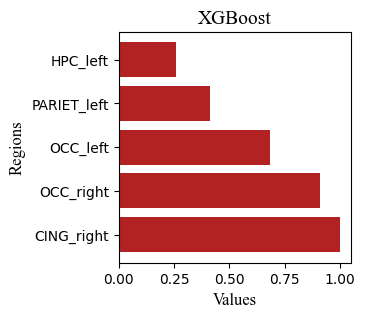

In [9]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


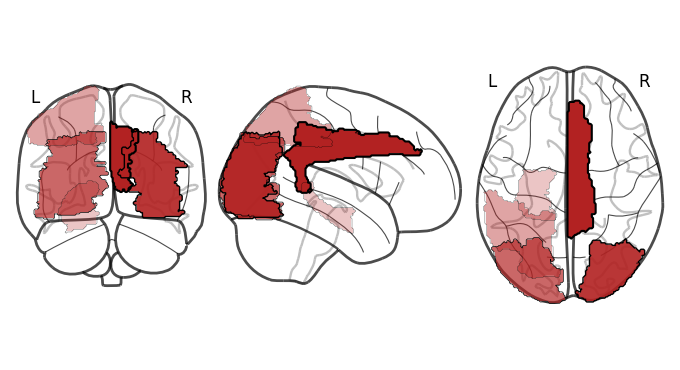

In [10]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)